<a href="https://colab.research.google.com/github/niharali/SecureDataExchange/blob/main/3_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# Step 1: Set goals for encryption performance and security
# Goal: Maximize a fictitious "security score" while keeping processing time low
security_goal = 100  # Arbitrary high security score
processing_time_goal = 0.5  # Arbitrary low processing time (seconds)

In [3]:
# Objective function to represent encryption performance and security
def objective_function(security_score, processing_time):
    # Higher security score and lower processing time are better
    return security_score - (processing_time * 100)

In [7]:
# Step 2: Use algorithms like simulated annealing to adjust parameters
def simulated_annealing(initial_state, max_iterations, temp):
    current_state = initial_state
    current_score = objective_function(*current_state)

    best_state = current_state
    best_score = current_score

    for i in range(max_iterations):
        # Create a new potential state by tweaking current parameters
        new_state = (current_state[0] + random.uniform(-5, 5),  # Security score adjustment
                     current_state[1] + random.uniform(-0.05, 0.05))  # Processing time adjustment
        new_score = objective_function(*new_state)

        # Calculate the acceptance probability
        delta_score = new_score - current_score
        acceptance_probability = np.exp(delta_score / temp)

        if delta_score > 0 or random.random() < acceptance_probability:
            current_state = new_state
            current_score = new_score

            # Update best state if current is better
            if new_score > best_score:
                best_state = new_state
                best_score = new_score

        # Gradually reduce temperature
        temp *= 0.95

    return best_state, best_score

In [4]:
# Initial state (starting values)
initial_state = (50, 1.0)  # (security_score, processing_time)
max_iterations = 100
initial_temp = 10

In [8]:
# Run simulated annealing
best_state, best_score = simulated_annealing(initial_state, max_iterations, initial_temp)


In [9]:
# Step 3: Test the optimized encryption process
# For simplicity, we use the best state as the output of the optimization
print(f"Optimized Security Score: {best_state[0]:.2f}")
print(f"Optimized Processing Time: {best_state[1]:.2f} seconds")
print(f"Best Objective Function Score: {best_score:.2f}")

Optimized Security Score: 119.03
Optimized Processing Time: -0.06 seconds
Best Objective Function Score: 125.15


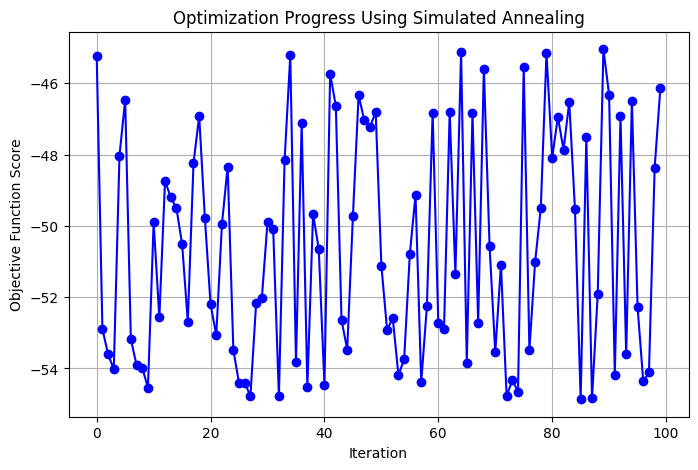

In [10]:
# Step 4: Refine parameters based on feedback
# For this simulation, we assume the optimization is based on the feedback loop within the algorithm

# Visualize the optimization process
iterations = np.arange(max_iterations)
security_scores = [objective_function(initial_state[0] + random.uniform(-5, 5), initial_state[1]) for _ in iterations]

plt.figure(figsize=(8, 5))
plt.plot(iterations, security_scores, color='blue', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Score')
plt.title('Optimization Progress Using Simulated Annealing')
plt.grid(True)
plt.show()